<a href="https://www.pieriandata.com"><img src="../Pierian_Data_Logo.PNG"></a>
<strong><center>Copyright by Pierian Data Inc.</center></strong> 
<strong><center>Created by Jose Marcial Portilla.</center></strong>

# Keras TF 2.0 - Code Along Classification Project

Let's explore a classification task with Keras API for TF 2.0

## The Data

### Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

    :Summary Statistics:

    ===================================== ====== ======
                                           Min    Max
    ===================================== ====== ======
    radius (mean):                        6.981  28.11
    texture (mean):                       9.71   39.28
    perimeter (mean):                     43.79  188.5
    area (mean):                          143.5  2501.0
    smoothness (mean):                    0.053  0.163
    compactness (mean):                   0.019  0.345
    concavity (mean):                     0.0    0.427
    concave points (mean):                0.0    0.201
    symmetry (mean):                      0.106  0.304
    fractal dimension (mean):             0.05   0.097
    radius (standard error):              0.112  2.873
    texture (standard error):             0.36   4.885
    perimeter (standard error):           0.757  21.98
    area (standard error):                6.802  542.2
    smoothness (standard error):          0.002  0.031
    compactness (standard error):         0.002  0.135
    concavity (standard error):           0.0    0.396
    concave points (standard error):      0.0    0.053
    symmetry (standard error):            0.008  0.079
    fractal dimension (standard error):   0.001  0.03
    radius (worst):                       7.93   36.04
    texture (worst):                      12.02  49.54
    perimeter (worst):                    50.41  251.2
    area (worst):                         185.2  4254.0
    smoothness (worst):                   0.071  0.223
    compactness (worst):                  0.027  1.058
    concavity (worst):                    0.0    1.252
    concave points (worst):               0.0    0.291
    symmetry (worst):                     0.156  0.664
    fractal dimension (worst):            0.055  0.208
    ===================================== ====== ======

    :Missing Attribute Values: None

    :Class Distribution: 212 - Malignant, 357 - Benign

    :Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

    :Donor: Nick Street

    :Date: November, 1995

This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass.  They describe
characteristics of the cell nuclei present in the image.

Separating plane described above was obtained using
Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree
Construction Via Linear Programming." Proceedings of the 4th
Midwest Artificial Intelligence and Cognitive Science Society,
pp. 97-101, 1992], a classification method which uses linear
programming to construct a decision tree.  Relevant features
were selected using an exhaustive search in the space of 1-4
features and 1-3 separating planes.

The actual linear program used to obtain the separating plane
in the 3-dimensional space is that described in:
[K. P. Bennett and O. L. Mangasarian: "Robust Linear
Programming Discrimination of Two Linearly Inseparable Sets",
Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:

ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

.. topic:: References

   - W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction 
     for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on 
     Electronic Imaging: Science and Technology, volume 1905, pages 861-870,
     San Jose, CA, 1993.
   - O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and 
     prognosis via linear programming. Operations Research, 43(4), pages 570-577, 
     July-August 1995.
   - W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques
     to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 
     163-171.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../DATA/cancer_classification.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


## EDA

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

c:\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


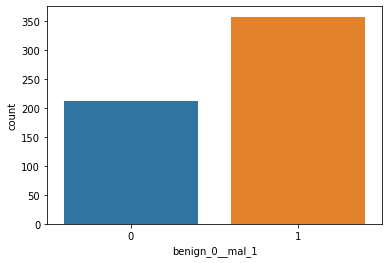

In [6]:
sns.countplot(x='benign_0__mal_1',data=df)

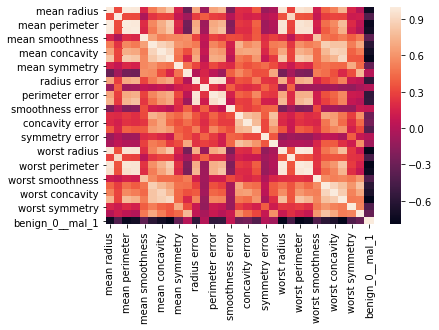

In [7]:
sns.heatmap(df.corr())

In [8]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

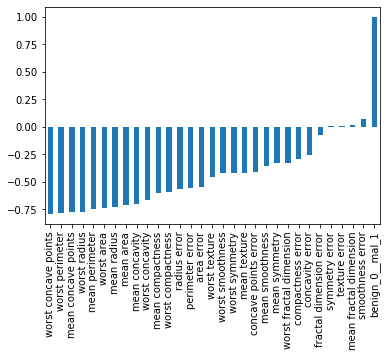

In [9]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

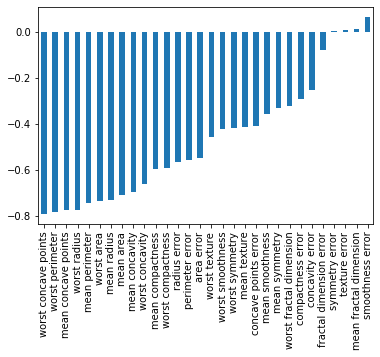

In [10]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

## Train Test Split

In [11]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)


## Scaling Data

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()

In [16]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [17]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Creating the Model

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
                  
    

In [61]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [62]:
X_train.shape

(426, 30)

In [63]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

model.add(Dense(units=30,activation='relu'))

model.add(Dense(units=15,activation='relu'))


model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

## Training the Model 

### Example One: Choosing too many epochs and overfitting!

In [64]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1
          )

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 30s 72ms/sample - loss: 0.6911 - val_loss: 0.6655
Epoch 2/600
426/426 [==============================] - 0s 82us/sample - loss: 0.6489 - val_loss: 0.6280
Epoch 3/600
426/426 [==============================] - 0s 80us/sample - loss: 0.6107 - val_loss: 0.5863
Epoch 4/600
426/426 [==============================] - 0s 80us/sample - loss: 0.5690 - val_loss: 0.5416
Epoch 5/600
426/426 [==============================] - 0s 75us/sample - loss: 0.5222 - val_loss: 0.4896
Epoch 6/600
426/426 [==============================] - 0s 80us/sample - loss: 0.4692 - val_loss: 0.4321
Epoch 7/600
426/426 [==============================] - 0s 82us/sample - loss: 0.4165 - val_loss: 0.3789
Epoch 8/600
426/426 [==============================] - 0s 80us/sample - loss: 0.3694 - val_loss: 0.3351
Epoch 9/600
426/426 [==============================] - 0s 80us/sample - loss: 0.3275 - val_loss: 0.2955
Epoch 10/600
426/

426/426 [==============================] - 0s 82us/sample - loss: 0.0527 - val_loss: 0.1222
Epoch 79/600
426/426 [==============================] - 0s 80us/sample - loss: 0.0521 - val_loss: 0.1229
Epoch 80/600
426/426 [==============================] - 0s 82us/sample - loss: 0.0521 - val_loss: 0.1251
Epoch 81/600
426/426 [==============================] - 0s 80us/sample - loss: 0.0534 - val_loss: 0.1159
Epoch 82/600
426/426 [==============================] - 0s 77us/sample - loss: 0.0514 - val_loss: 0.1280
Epoch 83/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0517 - val_loss: 0.1213
Epoch 84/600
426/426 [==============================] - 0s 77us/sample - loss: 0.0524 - val_loss: 0.1154
Epoch 85/600
426/426 [==============================] - 0s 77us/sample - loss: 0.0512 - val_loss: 0.1212
Epoch 86/600
426/426 [==============================] - 0s 80us/sample - loss: 0.0505 - val_loss: 0.1206
Epoch 87/600
426/426 [==============================] - 0s 75us/samp

426/426 [==============================] - 0s 89us/sample - loss: 0.0424 - val_loss: 0.1272
Epoch 156/600
426/426 [==============================] - 0s 87us/sample - loss: 0.0395 - val_loss: 0.1227
Epoch 157/600
426/426 [==============================] - 0s 92us/sample - loss: 0.0365 - val_loss: 0.1220
Epoch 158/600
426/426 [==============================] - 0s 87us/sample - loss: 0.0394 - val_loss: 0.1242
Epoch 159/600
426/426 [==============================] - 0s 85us/sample - loss: 0.0385 - val_loss: 0.1223
Epoch 160/600
426/426 [==============================] - 0s 87us/sample - loss: 0.0367 - val_loss: 0.1300
Epoch 161/600
426/426 [==============================] - 0s 94us/sample - loss: 0.0366 - val_loss: 0.1243
Epoch 162/600
426/426 [==============================] - 0s 94us/sample - loss: 0.0362 - val_loss: 0.1274
Epoch 163/600
426/426 [==============================] - 0s 103us/sample - loss: 0.0382 - val_loss: 0.1261
Epoch 164/600
426/426 [==============================] - 0s

426/426 [==============================] - 0s 85us/sample - loss: 0.0253 - val_loss: 0.1263
Epoch 233/600
426/426 [==============================] - 0s 82us/sample - loss: 0.0254 - val_loss: 0.1246
Epoch 234/600
426/426 [==============================] - 0s 82us/sample - loss: 0.0255 - val_loss: 0.1339
Epoch 235/600
426/426 [==============================] - 0s 89us/sample - loss: 0.0257 - val_loss: 0.1251
Epoch 236/600
426/426 [==============================] - 0s 92us/sample - loss: 0.0262 - val_loss: 0.1383
Epoch 237/600
426/426 [==============================] - 0s 80us/sample - loss: 0.0261 - val_loss: 0.1199
Epoch 238/600
426/426 [==============================] - 0s 85us/sample - loss: 0.0294 - val_loss: 0.1482
Epoch 239/600
426/426 [==============================] - 0s 85us/sample - loss: 0.0253 - val_loss: 0.1306
Epoch 240/600
426/426 [==============================] - 0s 85us/sample - loss: 0.0263 - val_loss: 0.1229
Epoch 241/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 87us/sample - loss: 0.0188 - val_loss: 0.1187
Epoch 310/600
426/426 [==============================] - 0s 87us/sample - loss: 0.0174 - val_loss: 0.1371
Epoch 311/600
426/426 [==============================] - 0s 87us/sample - loss: 0.0212 - val_loss: 0.1401
Epoch 312/600
426/426 [==============================] - 0s 85us/sample - loss: 0.0175 - val_loss: 0.1246
Epoch 313/600
426/426 [==============================] - 0s 85us/sample - loss: 0.0233 - val_loss: 0.1416
Epoch 314/600
426/426 [==============================] - 0s 85us/sample - loss: 0.0169 - val_loss: 0.1192
Epoch 315/600
426/426 [==============================] - 0s 85us/sample - loss: 0.0161 - val_loss: 0.1405
Epoch 316/600
426/426 [==============================] - 0s 87us/sample - loss: 0.0167 - val_loss: 0.1195
Epoch 317/600
426/426 [==============================] - 0s 85us/sample - loss: 0.0193 - val_loss: 0.1355
Epoch 318/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 80us/sample - loss: 0.0116 - val_loss: 0.1169
Epoch 387/600
426/426 [==============================] - 0s 80us/sample - loss: 0.0131 - val_loss: 0.1429
Epoch 388/600
426/426 [==============================] - 0s 82us/sample - loss: 0.0114 - val_loss: 0.1181
Epoch 389/600
426/426 [==============================] - 0s 80us/sample - loss: 0.0143 - val_loss: 0.1436
Epoch 390/600
426/426 [==============================] - 0s 80us/sample - loss: 0.0150 - val_loss: 0.1236
Epoch 391/600
426/426 [==============================] - 0s 77us/sample - loss: 0.0153 - val_loss: 0.1676
Epoch 392/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0137 - val_loss: 0.1252
Epoch 393/600
426/426 [==============================] - 0s 80us/sample - loss: 0.0110 - val_loss: 0.1490
Epoch 394/600
426/426 [==============================] - 0s 77us/sample - loss: 0.0114 - val_loss: 0.1249
Epoch 395/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 80us/sample - loss: 0.0077 - val_loss: 0.1389
Epoch 464/600
426/426 [==============================] - 0s 80us/sample - loss: 0.0075 - val_loss: 0.1419
Epoch 465/600
426/426 [==============================] - 0s 77us/sample - loss: 0.0075 - val_loss: 0.1358
Epoch 466/600
426/426 [==============================] - 0s 77us/sample - loss: 0.0088 - val_loss: 0.1558
Epoch 467/600
426/426 [==============================] - 0s 82us/sample - loss: 0.0073 - val_loss: 0.1330
Epoch 468/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0100 - val_loss: 0.1580
Epoch 469/600
426/426 [==============================] - 0s 77us/sample - loss: 0.0076 - val_loss: 0.1477
Epoch 470/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0075 - val_loss: 0.1467
Epoch 471/600
426/426 [==============================] - 0s 82us/sample - loss: 0.0083 - val_loss: 0.1509
Epoch 472/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 77us/sample - loss: 0.0050 - val_loss: 0.1719
Epoch 541/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0058 - val_loss: 0.1520
Epoch 542/600
426/426 [==============================] - 0s 80us/sample - loss: 0.0048 - val_loss: 0.1729
Epoch 543/600
426/426 [==============================] - 0s 80us/sample - loss: 0.0049 - val_loss: 0.1780
Epoch 544/600
426/426 [==============================] - 0s 82us/sample - loss: 0.0051 - val_loss: 0.1678
Epoch 545/600
426/426 [==============================] - 0s 77us/sample - loss: 0.0046 - val_loss: 0.1662
Epoch 546/600
426/426 [==============================] - 0s 80us/sample - loss: 0.0053 - val_loss: 0.1772
Epoch 547/600
426/426 [==============================] - 0s 80us/sample - loss: 0.0048 - val_loss: 0.1762
Epoch 548/600
426/426 [==============================] - 0s 77us/sample - loss: 0.0044 - val_loss: 0.1667
Epoch 549/600
426/426 [==============================] - 0s 

In [23]:
# https://stats.stackexchange.com/questions/164876/tradeoff-batch-size-vs-number-of-iterations-to-train-a-neural-network
# https://datascience.stackexchange.com/questions/18414/are-there-any-rules-for-choosing-the-size-of-a-mini-batch

model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1
          )

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 0s 77us/sample - loss: 0.0232 - val_loss: 0.2099
Epoch 2/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0245 - val_loss: 0.2309
Epoch 3/600
426/426 [==============================] - 0s 77us/sample - loss: 0.0214 - val_loss: 0.2121
Epoch 4/600
426/426 [==============================] - 0s 77us/sample - loss: 0.0223 - val_loss: 0.2034
Epoch 5/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0223 - val_loss: 0.1993
Epoch 6/600
426/426 [==============================] - 0s 77us/sample - loss: 0.0234 - val_loss: 0.2646
Epoch 7/600
426/426 [==============================] - 0s 77us/sample - loss: 0.0248 - val_loss: 0.1789
Epoch 8/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0293 - val_loss: 0.2425
Epoch 9/600
426/426 [==============================] - 0s 77us/sample - loss: 0.0285 - val_loss: 0.1732
Epoch 10/600
426/4

426/426 [==============================] - 0s 77us/sample - loss: 0.0228 - val_loss: 0.2259
Epoch 79/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0230 - val_loss: 0.2400
Epoch 80/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0228 - val_loss: 0.2319
Epoch 81/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0236 - val_loss: 0.2489
Epoch 82/600
426/426 [==============================] - 0s 82us/sample - loss: 0.0253 - val_loss: 0.2294
Epoch 83/600
426/426 [==============================] - 0s 68us/sample - loss: 0.0233 - val_loss: 0.2074
Epoch 84/600
426/426 [==============================] - 0s 68us/sample - loss: 0.0538 - val_loss: 0.3092
Epoch 85/600
426/426 [==============================] - 0s 70us/sample - loss: 0.0395 - val_loss: 0.1887
Epoch 86/600
426/426 [==============================] - 0s 70us/sample - loss: 0.0226 - val_loss: 0.2632
Epoch 87/600
426/426 [==============================] - 0s 70us/samp

426/426 [==============================] - 0s 77us/sample - loss: 0.0170 - val_loss: 0.2672
Epoch 156/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0200 - val_loss: 0.2128
Epoch 157/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0210 - val_loss: 0.3420
Epoch 158/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0240 - val_loss: 0.2626
Epoch 159/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0171 - val_loss: 0.2532
Epoch 160/600
426/426 [==============================] - 0s 70us/sample - loss: 0.0170 - val_loss: 0.2566
Epoch 161/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0169 - val_loss: 0.2475
Epoch 162/600
426/426 [==============================] - 0s 70us/sample - loss: 0.0238 - val_loss: 0.2095
Epoch 163/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0228 - val_loss: 0.2674
Epoch 164/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 75us/sample - loss: 0.0160 - val_loss: 0.2390
Epoch 233/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0164 - val_loss: 0.2552
Epoch 234/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0160 - val_loss: 0.2437
Epoch 235/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0182 - val_loss: 0.3123
Epoch 236/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0185 - val_loss: 0.2002
Epoch 237/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0277 - val_loss: 0.3649
Epoch 238/600
426/426 [==============================] - 0s 77us/sample - loss: 0.0185 - val_loss: 0.2116
Epoch 239/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0242 - val_loss: 0.2845
Epoch 240/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0162 - val_loss: 0.2637
Epoch 241/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 73us/sample - loss: 0.0150 - val_loss: 0.2760
Epoch 310/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0149 - val_loss: 0.2989
Epoch 311/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0139 - val_loss: 0.3093
Epoch 312/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0134 - val_loss: 0.2970
Epoch 313/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0152 - val_loss: 0.2812
Epoch 314/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0140 - val_loss: 0.2988
Epoch 315/600
426/426 [==============================] - 0s 70us/sample - loss: 0.0141 - val_loss: 0.3257
Epoch 316/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0155 - val_loss: 0.3091
Epoch 317/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0176 - val_loss: 0.2458
Epoch 318/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 73us/sample - loss: 0.0120 - val_loss: 0.3124
Epoch 387/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0113 - val_loss: 0.3303
Epoch 388/600
426/426 [==============================] - 0s 77us/sample - loss: 0.0130 - val_loss: 0.3402
Epoch 389/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0113 - val_loss: 0.2571
Epoch 390/600
426/426 [==============================] - 0s 77us/sample - loss: 0.0125 - val_loss: 0.3678
Epoch 391/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0149 - val_loss: 0.2750
Epoch 392/600
426/426 [==============================] - 0s 80us/sample - loss: 0.0112 - val_loss: 0.3785
Epoch 393/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0173 - val_loss: 0.2022
Epoch 394/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0562 - val_loss: 0.5177
Epoch 395/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 75us/sample - loss: 0.0142 - val_loss: 0.2811
Epoch 464/600
426/426 [==============================] - 0s 77us/sample - loss: 0.0170 - val_loss: 0.4902
Epoch 465/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0266 - val_loss: 0.2702
Epoch 466/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0151 - val_loss: 0.3519
Epoch 467/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0143 - val_loss: 0.3481
Epoch 468/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0095 - val_loss: 0.3139
Epoch 469/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0099 - val_loss: 0.3460
Epoch 470/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0125 - val_loss: 0.2856
Epoch 471/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0124 - val_loss: 0.3243
Epoch 472/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 75us/sample - loss: 0.0115 - val_loss: 0.3149
Epoch 541/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0139 - val_loss: 0.4279
Epoch 542/600
426/426 [==============================] - 0s 77us/sample - loss: 0.0130 - val_loss: 0.3433
Epoch 543/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0085 - val_loss: 0.3320
Epoch 544/600
426/426 [==============================] - 0s 70us/sample - loss: 0.0090 - val_loss: 0.3291
Epoch 545/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0078 - val_loss: 0.3627
Epoch 546/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0082 - val_loss: 0.3722
Epoch 547/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0080 - val_loss: 0.3680
Epoch 548/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0123 - val_loss: 0.3152
Epoch 549/600
426/426 [==============================] - 0s 

In [113]:
# model.history.history

In [65]:
model_loss = pd.DataFrame(model.history.history)

In [66]:
# model_loss

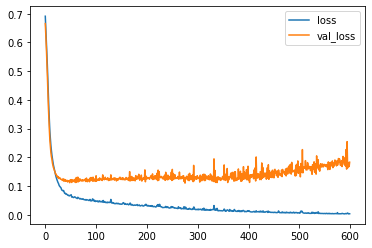

In [67]:
model_loss.plot()

## Example Two: Early Stopping

We obviously trained too much! Let's use early stopping to track the val_loss and stop training once it begins increasing too much!

In [68]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [69]:
from tensorflow.keras.callbacks import EarlyStopping

Stop training when a monitored quantity has stopped improving.

    Arguments:
        monitor: Quantity to be monitored.
        min_delta: Minimum change in the monitored quantity
            to qualify as an improvement, i.e. an absolute
            change of less than min_delta, will count as no
            improvement.
        patience: Number of epochs with no improvement
            after which training will be stopped.
        verbose: verbosity mode.
        mode: One of `{"auto", "min", "max"}`. In `min` mode,
            training will stop when the quantity
            monitored has stopped decreasing; in `max`
            mode it will stop when the quantity
            monitored has stopped increasing; in `auto`
            mode, the direction is automatically inferred
            from the name of the monitored quantity.

In [70]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [71]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 2ms/sample - loss: 0.6899 - val_loss: 0.6587
Epoch 2/600
426/426 [==============================] - 0s 80us/sample - loss: 0.6398 - val_loss: 0.6172
Epoch 3/600
426/426 [==============================] - 0s 82us/sample - loss: 0.5944 - val_loss: 0.5720
Epoch 4/600
426/426 [==============================] - 0s 87us/sample - loss: 0.5459 - val_loss: 0.5225
Epoch 5/600
426/426 [==============================] - 0s 85us/sample - loss: 0.4956 - val_loss: 0.4714
Epoch 6/600
426/426 [==============================] - 0s 85us/sample - loss: 0.4457 - val_loss: 0.4214
Epoch 7/600
426/426 [==============================] - 0s 89us/sample - loss: 0.3991 - val_loss: 0.3748
Epoch 8/600
426/426 [==============================] - 0s 87us/sample - loss: 0.3541 - val_loss: 0.3307
Epoch 9/600
426/426 [==============================] - 0s 87us/sample - loss: 0.3148 - val_loss: 0.2921
Epoch 10/600
426/42

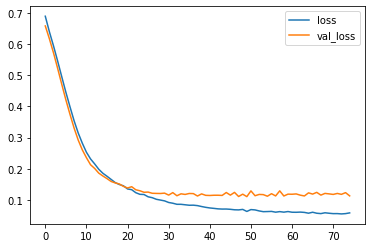

In [72]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

## Example Three: Adding in DropOut Layers

In [73]:
from tensorflow.keras.layers import Dropout

In [74]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [75]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
#          verbose=1,validation_split=0.2,
          callbacks=[early_stop]
          )

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 2ms/sample - loss: 0.6871 - val_loss: 0.6680
Epoch 2/600
426/426 [==============================] - 0s 85us/sample - loss: 0.6802 - val_loss: 0.6476
Epoch 3/600
426/426 [==============================] - 0s 89us/sample - loss: 0.6500 - val_loss: 0.6227
Epoch 4/600
426/426 [==============================] - 0s 87us/sample - loss: 0.6329 - val_loss: 0.5944
Epoch 5/600
426/426 [==============================] - 0s 94us/sample - loss: 0.6084 - val_loss: 0.5675
Epoch 6/600
426/426 [==============================] - 0s 80us/sample - loss: 0.6035 - val_loss: 0.5407
Epoch 7/600
426/426 [==============================] - 0s 85us/sample - loss: 0.5648 - val_loss: 0.5142
Epoch 8/600
426/426 [==============================] - 0s 87us/sample - loss: 0.5525 - val_loss: 0.4861
Epoch 9/600
426/426 [==============================] - 0s 93us/sample - loss: 0.5442 - val_loss: 0.4626
Epoch 10/600
426/42

426/426 [==============================] - 0s 92us/sample - loss: 0.1303 - val_loss: 0.0835
Epoch 79/600
426/426 [==============================] - 0s 87us/sample - loss: 0.1091 - val_loss: 0.0830
Epoch 80/600
426/426 [==============================] - 0s 87us/sample - loss: 0.1283 - val_loss: 0.1051
Epoch 81/600
426/426 [==============================] - 0s 89us/sample - loss: 0.1307 - val_loss: 0.0870
Epoch 82/600
426/426 [==============================] - 0s 85us/sample - loss: 0.1221 - val_loss: 0.0772
Epoch 83/600
426/426 [==============================] - 0s 85us/sample - loss: 0.1265 - val_loss: 0.0858
Epoch 84/600
426/426 [==============================] - 0s 92us/sample - loss: 0.1145 - val_loss: 0.0749
Epoch 85/600
426/426 [==============================] - 0s 87us/sample - loss: 0.1172 - val_loss: 0.0791
Epoch 86/600
426/426 [==============================] - 0s 82us/sample - loss: 0.1211 - val_loss: 0.0754
Epoch 87/600
426/426 [==============================] - 0s 85us/samp

426/426 [==============================] - 0s 87us/sample - loss: 0.0685 - val_loss: 0.0861
Epoch 156/600
426/426 [==============================] - 0s 87us/sample - loss: 0.0726 - val_loss: 0.0811
Epoch 157/600
426/426 [==============================] - 0s 89us/sample - loss: 0.0751 - val_loss: 0.0815
Epoch 158/600
426/426 [==============================] - 0s 85us/sample - loss: 0.0898 - val_loss: 0.0729
Epoch 159/600
426/426 [==============================] - 0s 80us/sample - loss: 0.0771 - val_loss: 0.0967
Epoch 160/600
426/426 [==============================] - 0s 85us/sample - loss: 0.0990 - val_loss: 0.0767
Epoch 161/600
426/426 [==============================] - 0s 84us/sample - loss: 0.0869 - val_loss: 0.0861
Epoch 162/600
426/426 [==============================] - 0s 87us/sample - loss: 0.0645 - val_loss: 0.0819
Epoch 163/600
426/426 [==============================] - 0s 85us/sample - loss: 0.0892 - val_loss: 0.0688
Epoch 164/600
426/426 [==============================] - 0s 

In [57]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 1ms/sample - loss: 0.6934 - val_loss: 0.6865
Epoch 2/600
426/426 [==============================] - 0s 89us/sample - loss: 0.6818 - val_loss: 0.6789
Epoch 3/600
426/426 [==============================] - 0s 85us/sample - loss: 0.6842 - val_loss: 0.6738
Epoch 4/600
426/426 [==============================] - 0s 87us/sample - loss: 0.6660 - val_loss: 0.6636
Epoch 5/600
426/426 [==============================] - 0s 82us/sample - loss: 0.6460 - val_loss: 0.6502
Epoch 6/600
426/426 [==============================] - 0s 85us/sample - loss: 0.6377 - val_loss: 0.6300
Epoch 7/600
426/426 [==============================] - 0s 87us/sample - loss: 0.6150 - val_loss: 0.6143
Epoch 8/600
426/426 [==============================] - 0s 89us/sample - loss: 0.6119 - val_loss: 0.5958
Epoch 9/600
426/426 [==============================] - 0s 89us/sample - loss: 0.6094 - val_loss: 0.5715
Epoch 10/600
426/42

426/426 [==============================] - 0s 87us/sample - loss: 0.1321 - val_loss: 0.1067
Epoch 79/600
426/426 [==============================] - 0s 87us/sample - loss: 0.1357 - val_loss: 0.1031
Epoch 80/600
426/426 [==============================] - 0s 89us/sample - loss: 0.1140 - val_loss: 0.1023
Epoch 81/600
426/426 [==============================] - 0s 82us/sample - loss: 0.1463 - val_loss: 0.1060
Epoch 82/600
426/426 [==============================] - 0s 82us/sample - loss: 0.1294 - val_loss: 0.1094
Epoch 83/600
426/426 [==============================] - 0s 85us/sample - loss: 0.1306 - val_loss: 0.1093
Epoch 84/600
426/426 [==============================] - 0s 87us/sample - loss: 0.1061 - val_loss: 0.1052
Epoch 85/600
426/426 [==============================] - 0s 85us/sample - loss: 0.1437 - val_loss: 0.1094
Epoch 86/600
426/426 [==============================] - 0s 87us/sample - loss: 0.1345 - val_loss: 0.1061
Epoch 87/600
426/426 [==============================] - 0s 80us/samp

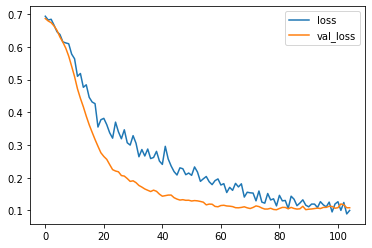

In [58]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

# Model Evaluation

In [59]:
predictions = model.predict_classes(X_test)

In [53]:
from sklearn.metrics import classification_report,confusion_matrix

In [54]:
# https://en.wikipedia.org/wiki/Precision_and_recall
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [60]:
print(confusion_matrix(y_test,predictions))

[[53  2]
 [ 2 86]]
